In [5]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
#Подгружаем DataSet Mall_Customets
customers_dataset = pd.read_csv('Mall_Customers.csv', encoding='latin-1') 

In [13]:
# Первые 5 строк датасета
print(customers_dataset.head())

   CustomerID  Gender  Age  Annual_Income(k$)  Spending_Score Married  \
0           1    Male   19                 15              39       N   
1           2    Male   21                 15              81       Y   
2           3  Female   20                 16               6       N   
3           4  Female   23                 16              77       Y   
4           5  Female   31                 17              40       Y   

           City  Number_of_sales  
0  Philadelphia               10  
1  Philadelphia               11  
2  Philadelphia                8  
3  Philadelphia                7  
4  Philadelphia                9  


In [14]:
# Размер датасета - 68 строк, 8 колонок
print(customers_dataset.shape)

(68, 8)


In [16]:
 # Список колонок с типами данных
print(customers_dataset.dtypes)

CustomerID            int64
Gender               object
Age                   int64
Annual_Income(k$)     int64
Spending_Score        int64
Married              object
City                 object
Number_of_sales       int64
dtype: object


In [19]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in customers_dataset.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = customers_dataset[customers_dataset[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

CustomerID - 0
Gender - 0
Age - 0
Annual_Income(k$) - 0
Spending_Score - 0
Married - 0
City - 0
Number_of_sales - 0


In [20]:
  #Вывод данных сгруппированных по городу и ежегодному доходу
print(customers_dataset.groupby('City')['Annual_Income(k$)'].describe())

              count       mean       std   min    25%   50%    75%   max
City                                                                    
Chicago        13.0  30.461538  2.366974  28.0  28.00  30.0  33.00  34.0
Los Angeles     9.0  41.777778  1.394433  40.0  40.00  42.0  43.00  43.0
New York       12.0  46.583333  1.505042  44.0  46.00  46.5  48.00  48.0
Philadelphia   18.0  18.333333  1.940285  15.0  17.00  19.0  20.00  21.0
Phoenix         6.0  24.000000  0.894427  23.0  23.25  24.0  24.75  25.0
Washington     10.0  38.000000  1.699673  34.0  37.25  38.5  39.00  40.0


In [21]:
#основные статистические характеристики набора
customers_dataset.describe()

,CustomerID,Age,Annual_Income(k$),Spending_Score,Number_of_sales
count,68.00000,68.000000,68.000000,68.000000,68.000000
mean,34.50000,40.058824,32.132353,49.970588,22.764706
std,19.77372,16.830039,10.754943,25.993668,13.541663
min,1.00000,18.000000,15.000000,3.000000,1.000000
25%,17.75000,24.750000,21.000000,34.250000,10.750000
50%,34.50000,35.000000,33.000000,50.500000,20.500000
75%,51.25000,51.250000,42.000000,73.000000,31.000000
max,68.00000,89.000000,48.000000,99.000000,48.000000


In [22]:
#Определяем уникальные значения для целефого признака
customers_dataset['Spending_Score'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 48, 59], dtype=int64)

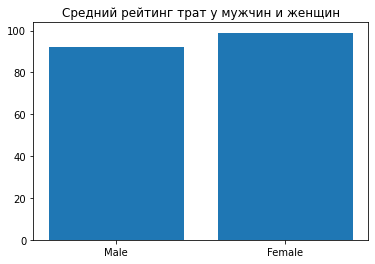

In [23]:
plt.bar(customers_dataset['Gender'], customers_dataset['Spending_Score'])
plt.title('Средний рейтинг трат у мужчин и женщин')
plt.show()

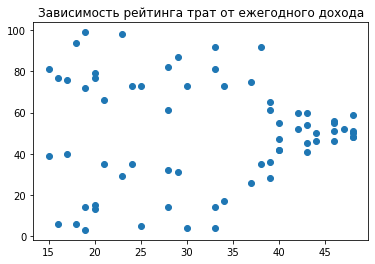

In [24]:
plt.scatter(customers_dataset['Annual_Income(k$)'], customers_dataset['Spending_Score'])
plt.title('Зависимость рейтинга трат от ежегодного дохода')
plt.show()

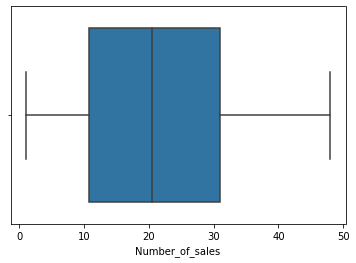

In [25]:
sns.boxplot(x=customers_dataset['Number_of_sales'])
plt.show()

<AxesSubplot:xlabel='Number_of_sales', ylabel='Annual_Income(k$)'>

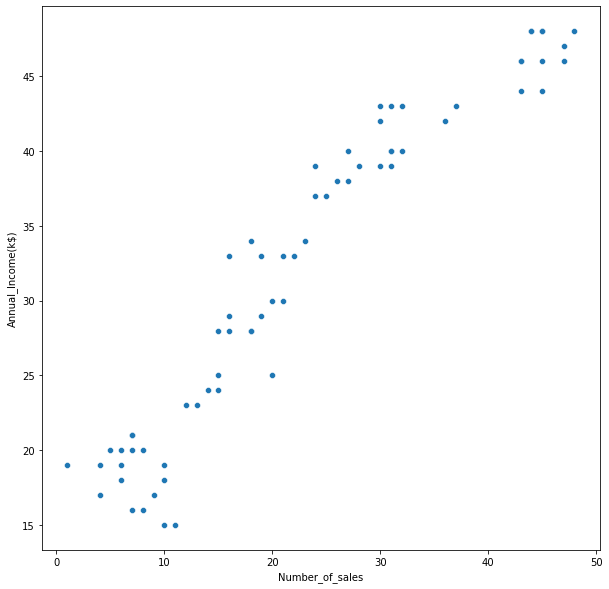

In [31]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Number_of_sales', y='Annual_Income(k$)', data=customers_dataset)

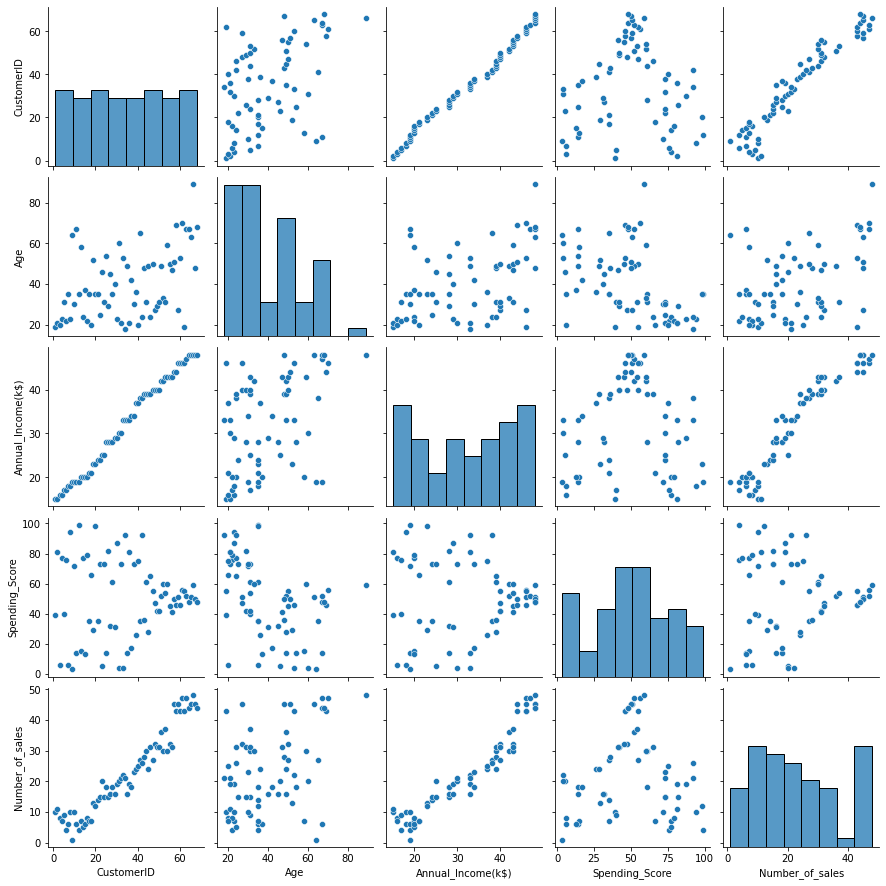

In [32]:
sns.pairplot(customers_dataset)

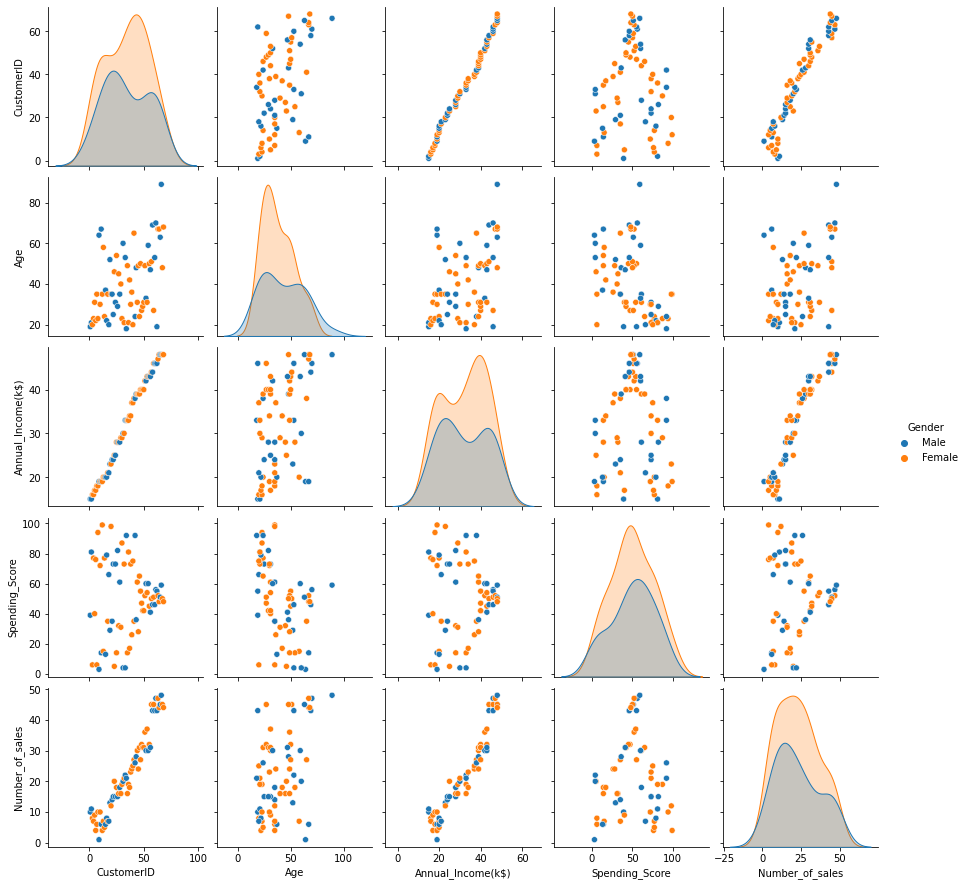

In [34]:
sns.pairplot(customers_dataset, hue="Gender")

<AxesSubplot:xlabel='Annual_Income(k$)'>

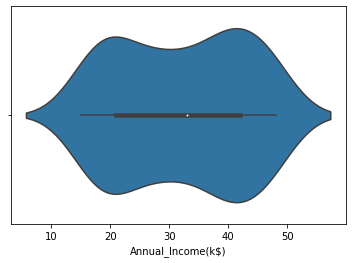

In [35]:
sns.violinplot(x=customers_dataset['Annual_Income(k$)'])

<AxesSubplot:xlabel='City', ylabel='Number_of_sales'>

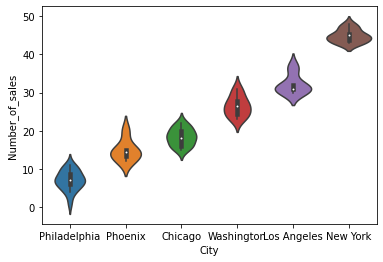

In [37]:
# Распределение параметра Number_of_sales сгруппированные по City.
sns.violinplot(x='City', y='Number_of_sales', data=customers_dataset)

In [38]:
#информация о корреляции
customers_dataset.corr()

,CustomerID,Age,Annual_Income(k$),Spending_Score,Number_of_sales
CustomerID,1.000000,0.449520,0.994731,0.025670,0.958110
Age,0.449520,1.000000,0.438797,-0.465456,0.439100
Annual_Income(k$),0.994731,0.438797,1.000000,0.009517,0.955549
Spending_Score,0.025670,-0.465456,0.009517,1.000000,0.038015
Number_of_sales,0.958110,0.439100,0.955549,0.038015,1.000000


In [40]:
customers_dataset.corr(method='kendall')

,CustomerID,Age,Annual_Income(k$),Spending_Score,Number_of_sales
CustomerID,1.000000,0.312118,0.983847,0.009713,0.839189
Age,0.312118,1.000000,0.325816,-0.363033,0.259426
Annual_Income(k$),0.983847,0.325816,1.000000,0.002244,0.853418
Spending_Score,0.009713,-0.363033,0.002244,1.000000,0.037492
Number_of_sales,0.839189,0.259426,0.853418,0.037492,1.000000


<AxesSubplot:>

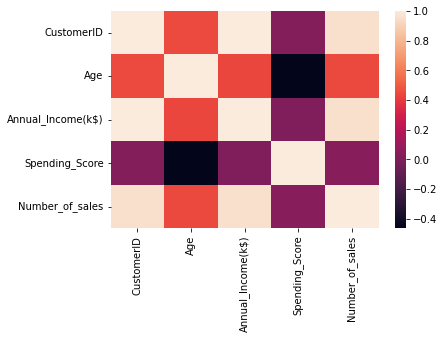

In [41]:
sns.heatmap(customers_dataset.corr())

<AxesSubplot:>

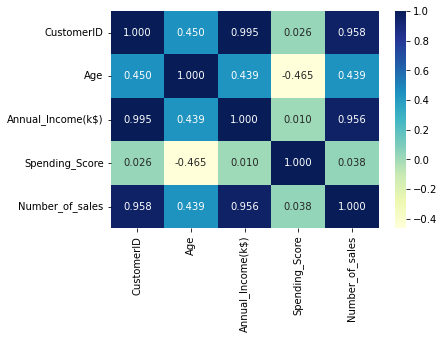

In [42]:
# Изменение цветовой гаммы
sns.heatmap(customers_dataset.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

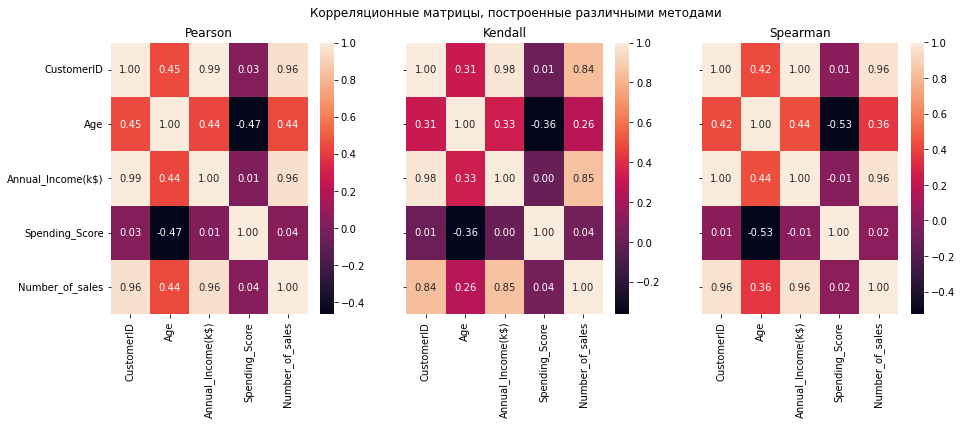

In [43]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(customers_dataset.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(customers_dataset.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(customers_dataset.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')